<a href="https://colab.research.google.com/github/tomotaka-inoue/mysite/blob/master/analyze_kokyaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mecabとjanomeのインストール
# targetオプションで保存先の指定

!pip install --target /content/drive/MyDrive/Colab\ Notebooks/my-modules mecab-python3
!pip install --target /content/drive/MyDrive/Colab\ Notebooks/my-modules janome

     |████████████████████████████████| 488 kB 42.9 MB/s 
     |████████████████████████████████| 19.7 MB 5.1 MB/s 


In [2]:
# 各関数のインポートとドライブのマウント
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
!apt-get -y install fonts-ipafont-gothic
from janome.tokenizer import Tokenizer
import math
import csv
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,058 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [3]:
# こきゃまんアンケート結果ｃｓｖ読み込み
df = pd.read_csv('/content/drive/MyDrive/Analytics/kokyaman_questionnaire_results.csv')


In [4]:
def get_word_list(df, rank):
  # トークン生成
  t = Tokenizer()
  words = []
  word_dic = {}
  
  #  フリー回答の各名詞・形容詞・副詞の出現回数をカウント
  for i, rows in df_nps.iterrows():
      malist = t.tokenize(str(rows['nps_reason']))
      for w in malist:
          word = w.surface
          if word in ['こと', 'の', 'よう', 'ご', 'ん', 'そう', 'ため', 'そう', 'これ', 'もの', 'ない', 'くだ', 'さん', '.' ,'際']:
            continue 
          ps = w.part_of_speech.split(",")[0]
          if not ps in ["形容詞", "名詞", "副詞"]: 
            continue
  #        if not ps in ["名詞"]: continue
          if not word in word_dic:
              word_dic[word] = 0
          word_dic[word] += 1
          #words.append(w.surface)
          words.append(w.base_form)

  # 出現した文字をすべて結合 
  text = ' '.join(words)
  print(text)

  keys = sorted(word_dic.items(), key= lambda x:x[1], reverse=True)
  print(keys)

  f = open('/content/drive/MyDrive/Analytics/nps_reson_' + rank + '.csv', 'w')　#ｃｓｖ吐き出し
  writer = csv.writer(f)
  header = ['word', 'count_'+ rank]　#ヘッダ指定
  writer.writerow(header)
  writer.writerows(keys)
  f.close()

# 各単語の出現回数出力
  for word, cnt in keys[:100]:
      print("{0}({1})".format(word, cnt), end=" | ")

  # not_words = [ u'こと', u'の', u'よう', u'ご', u'ん', u'そう', u'ため',u'そう', u'これ', u'もの', u'ない']

# ワードクラウド作成
  wc = WordCloud(background_color="white", 
  #               colormap = "winter",
                width=900, height=600, 
                font_path = '/usr/share/fonts/truetype/fonts-japanese-mincho.ttf', 
                #  stopwords=set(not_words)
                collocations = False,
                )
  
  wc.generate(text)
  plt.figure(figsize=(15,12))
  plt.imshow(wc)
  plt.axis("off")
  
  plt.show()

high層の人数：573
mid層の人数：322
low層の人数：283
high
自身 スキル 魅力 的 書き方 案件 スタート 時期 方 いい 具体 的 私 想定 質問 前 先 カウンセリング 時間 有意義 話 中 こちら 状況 希望 条件 複数 可能 性 迅速 提示 案件 知識 頼もしい 懇切 丁寧 対応 やすい 雰囲気 リラックス 自分 状況 カウンセラー 方 案内 丁寧 こちら 不明 点 解消 進行 案件 豊富 とても 丁寧 とても 親切 対応 カウンセリング 丁寧 カウンセリング 会話 今後 動き 方 明確 丁寧 楽しい カウンセリング 多く 項目 お伝え 細か 安心 職務 経歴 仕事 考え方 等々 相手 事 理解 姿勢 良い とても 親身 カウンセリング 自分 案件 提案 安心 かなり 詳細 お話 大変 懐 大きい さ 業界 知識 今後 展望 一緒 提案 自分 頭 整理 事 じっくり 内容 等 話 説明 こちら 質問 しっかり 説明 丁寧 親身 対応 私 自身 安心 丁寧 カウンセリング まだ 利用 開始 契約 ９ エージェント 理解 自分 スキル 世の中 必要 おすすめ フリーランス 方 丁寧 派遣 会社 登録 とても 丁寧 対応 派遣 社員 大事 担当 者 LINE 相談 あまり 他 近い 距離 いろいろ 相談 仕事 条件 面 交渉 お願い 提案 早い 有名 企業 案件 案件 内容 信用 案件 多様 さ 友人 登録 体験 談 フリーランス 初めて いい 雰囲気 やすい 話 親身 正確 エージェント 方 親切 丁寧 具体 的 案件 説明 ところ 他 エージェント いい 総合 的 いい チャンネル 多い ほう 良い フリーランス 不安 これから 方 条件 親身 受け答え 変 営業 事実 ベース お話 すごい 対応 良い さ 案件 多い さ 経験 年数 1 年 半 浅い 希望 案件 私 初めて 利用 不安 点 解消 質問 丁寧 直接 案件 関係 質問 真摯 対応 感謝 スマホ 入力 フォーム バグ 笑 iOS 入力 点滅 テキスト 位置 左寄せ 笑 カウンセリング 素晴らしい 感謝 特に 不満 2 ~ 3 年 すぐ 転職 必要 状態 丁寧 対応 非常 易い 説明 簡潔 丁寧 具体 的 対応 信頼 印象 会話 やり取り 穏やか 冷静 明確 とても 良い 印

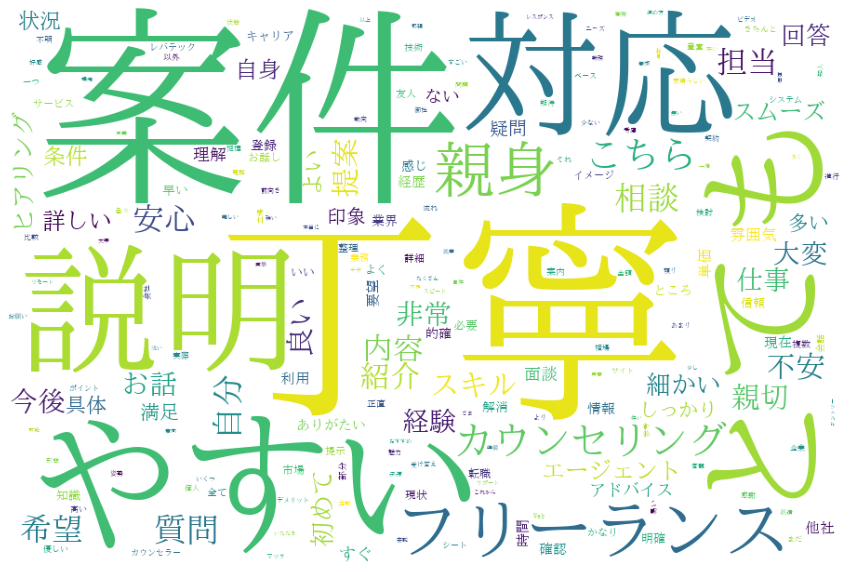

mid
転職 関連 プライベート 話 大いに なかなか ところ 肯定 的 お話 わたし ありがたい 打ち合わせ 内容 詳細 的 安心 案件 すぐ 紹介 レスポンス 早い よい 親切 丁寧 スムーズ 特に 減点 ポイント カウンセリング 良しあし 人 事 8 親身 相談 周り フリーランス 知人 気軽 やすい 質問 とても 丁寧 対応 信頼 丁寧 対応 スムーズ やりとり 気持ちよい 案件 話 まだ 実際 御社 経由 仕事 発生 わけ 詳細 づらい 可能 性 広い 意味 登録 意義 丁寧 説明 為 最も 案件 保有 数 多い 信頼 度 高い カウンセリング 現状 把握 可能 性 為 対応 スムーズ すぐ 転職 自分 意見 誠実 相談 細かい 話 ほんとに 自分 案件 意思 とても 対応 優しい アドバイス 心強い 全く 知識 詳細 非常 スムーズ 柔軟 相談 砂 口 色々 親切 回答 未来 行動 実際 まだ 行動 点数 フリーランス 初心者 やすい 終始 丁寧 対応 こちら 質問 丁寧 お答え 担当 者 とても 丁寧 エクセル スキル シート 若干 入力 づらい 改善 方 良い 丁寧 カウンセリング 安心 感 他 サービス やりがい 案件 充実 為 カウンセラー 方 対応 良い 報酬 交渉 等 案件 もう少し 多い いい 全体 的 大変 親切 やすい 問題 丁寧 説明 サポート 体制 完備 案件 保有 数 プラットフォーム 完備 担当 者 性格 丁寧 ところ とても よい 10 2 段階 絶対 紹介 使命 感 そこ 8 評価 詳細 フリーランス 説明 案件 紹介 有意義 時間 企業 求職 者 フリーランス マッチング ビジネス 貴重 丁寧 対応 希望 条件 等 しっかり ヒアリング 今後 流れ 等 きっちり 面談 とても 真摯 回答 丁寧 対応 条件 方 それとなく オススメ よい こちら 状況 希望 考慮 上 紹介 案件 種類 単価 感 方 気 点 丁寧 レバテック 経由 プロジェクト 参加 場合 方 イメージ やすい しっかり ヒアリング とても やすい 希望 しっかり 丁寧 カウンセリング 希望 仕事 やすい やすい 説明 今後 キャリア 形成 不安 点 方向 案件 点 解消 担当 山田 悠 暉 さま 真摯 姿勢 とても 印象 こちら づらい 質問 丁寧 はっき

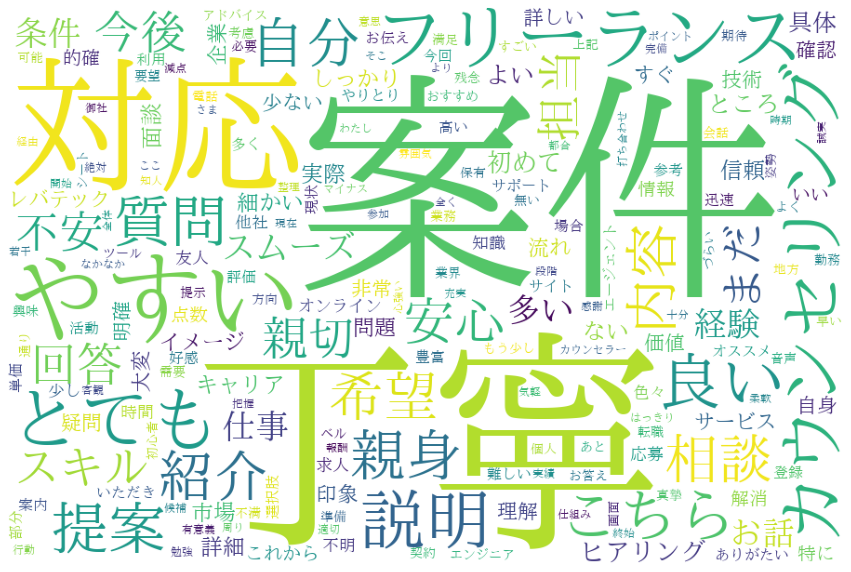

low
まだ 案件 受託 為 間 5 担当 方 対応 とても 良い レバテック 以外 会社 比較 5 現状 親身 相談 とても 丁寧 対応 話 整理 よい フリーランス 選択 理由 一つ 自宅 仕事 方 多い 在宅 選択 方 多く フルタイム 人 他社 カウンセリング 比較 悪い 印象 魅力 的 案件 豊富 時間 大きい やや 懸念 印象 あわ 人 よりけり コンテンツ サウンド 制作 関連 特殊 業種 性格 上 やはり 案件 数 丁寧 対応 案内 スムーズ やすい フリーランス 現況 説明 参考 レバテック 様 担当 当方 質問 コミュニケーション 非常 スムーズ やすい 妥当 カウンセリング もう少し 時間 いろいろ 本日 初めて カウンセリング 応募 案件 以外 別 案 提示 安心 他 クリエイティブ 系 派遣 会社 登録 なかなか 積極 的 連絡 会社 多い 機会 用意 ありがたい 経験 浅い 部分 丁寧 対応 対応 丁寧 カウンセリング Google Meet 音声 画像 不調 中 すぐ 電話 親身 対応 プラットフォーム アクセス 後 点 いくつ 今後 こう 形態 仕事 仕方 普及 まだ 登録 間 紹介 案件 数 未だ 多い 判断 まだ 登録 したて 10 点 カウンセリング 内容 不満 こう 対応 等 問題 良い 自分 周り フリーランス 人間 業務 委託 雇用 形態 紹介 にくい カウンセリング 印象 とても 良い まだ 案件 訳 無条件 会社 信頼 性 今 ところ ほか サービス 差 特筆 人 感じ まだ 正社員 案件 多い フリーランス 案件 今回 私 初めて 評価 難しい 1 要望 案件 即座 2 可能 事 対応 難しい 事 明確 友達 どう 判断 カウンセリング お話し 経験 不足 私 対応 良い 友達 直ぐ フリーランス 予定 無い 親身 相談 親切 案件 動き 早い 仕事 豊富 カウンセリング 単に 条件 等 気 実際 案件 等 判断 自分 思考 無い 業界 企業 紹介 新た 可能 性 発見 気 未だ サービス 詳細 普通 良い 感じ カウンセリング 話 モチベーション 感じ ない 点数 まだ 曖昧 状況 話 相場 観 情報 提供 想像 やすい 特に まだ 案件 わけ なんとも 対応 丁寧 好感 案件 豊富 現在 自身 単価 確認 良い 

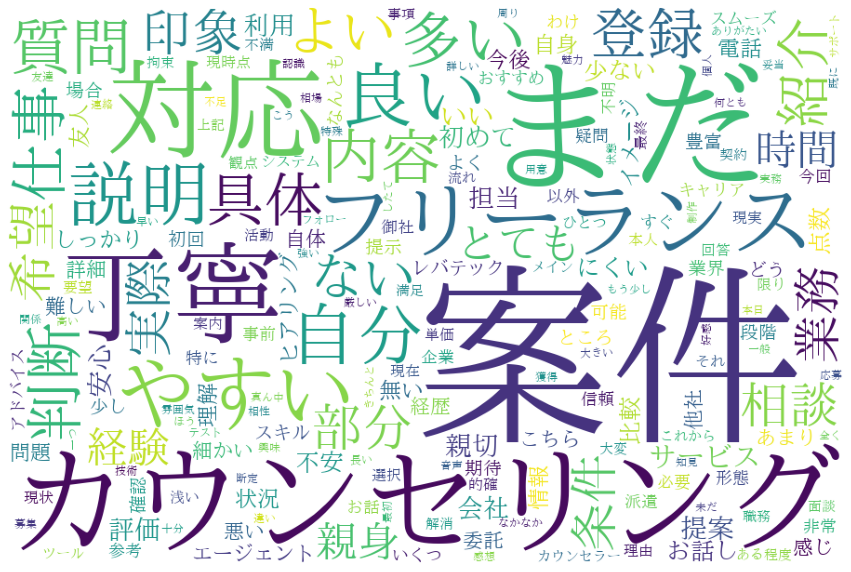

In [5]:
# npsの値を元に3分割　理由の記載がないものは消去 
df_nps_high = df.query('9 <= nps').dropna(subset=['nps_reason'])
df_nps_mid = df.query('8 <= nps < 9').dropna(subset=['nps_reason'])
df_nps_low = df.query('nps < 8').dropna(subset=['nps_reason'])

# 各グループの人数出力
print("high層の人数："+str(len(df_nps_high)))
print("mid層の人数："+str(len(df_nps_mid)))
print("low層の人数："+str(len(df_nps_low)))

for df_nps, rank in [(df_nps_high,'high'), (df_nps_mid, 'mid'), (df_nps_low, 'low')]:
# for df_nps, rank in [(df_nps_high,'high'), (df_nps_low, 'low')]:
  print(rank)
  get_word_list(df_nps, rank)

In [6]:
# 各グループのワードリストを読み込み
df_word_list_high = pd.read_csv('/content/drive/MyDrive/Analytics/nps_reson_high.csv')
df_word_list_mid = pd.read_csv('/content/drive/MyDrive/Analytics/nps_reson_mid.csv')
df_word_list_low = pd.read_csv('/content/drive/MyDrive/Analytics/nps_reson_low.csv')

# joinして各単語ごとにhigh/lowの回数を出す
df_word_list = pd.merge(df_word_list_high, df_word_list_low, on='word', how='outer').fillna(0)

# 出現率もだす
df_word_list['ratio_count_high'] = df_word_list['count_high'] / len(df_word_list_high) *100
df_word_list['ratio_count_low'] = df_word_list['count_low'] / len(df_word_list_low) *100

# 出現率の差分も出す
df_word_list['diff_ratio_count'] = df_word_list['ratio_count_high'] - df_word_list['ratio_count_low']
df_word_list['abs_diff_ratio_count'] = df_word_list['diff_ratio_count'].abs()

df_word_list_sorted = df_word_list.sort_values(by='abs_diff_ratio_count', ascending=False)

print(df_word_list)
print(df_word_list_sorted)

df_word_list_sorted.to_csv('/content/drive/MyDrive/Analytics/word_list.csv')

     word  count_high  ...  diff_ratio_count  abs_diff_ratio_count
0      丁寧       172.0  ...         14.323246             14.323246
1      案件       138.0  ...          2.220276              2.220276
2     とても       107.0  ...         10.969651             10.969651
3      説明       107.0  ...          8.640458              8.640458
4      対応       105.0  ...          6.540137              6.540137
...   ...         ...  ...               ...                   ...
1125   否定         0.0  ...         -0.155280              0.155280
1126  お薦め         0.0  ...         -0.155280              0.155280
1127   人件         0.0  ...         -0.155280              0.155280
1128    費         0.0  ...         -0.155280              0.155280
1129   安い         0.0  ...         -0.155280              0.155280

[1130 rows x 7 columns]
    word  count_high  ...  diff_ratio_count  abs_diff_ratio_count
0     丁寧       172.0  ...         14.323246             14.323246
2    とても       107.0  ...         10.96

In [7]:
# from google.colab import auth
# auth.authenticate_user()

# %%bigquery --project lt-datainfra-prod df
# SELECT * FROM lt-datainfra-prod.view_ltsf.engineers


In [8]:
# !pip install --target /content/drive/MyDrive/Colab\ Notebooks/my-modules google-cloud-bigquery
#

In [9]:
# 以下、有意差出そうとした部分
# 多分間違ってる

import numpy as np
from scipy import stats

df_high = df[df['nps'] >= 9]
df_low = df[df['nps'] <= 7]


In [10]:
A = df_high['score_quality_of_suggestion'].to_numpy()
B = df_low['score_quality_of_suggestion'].to_numpy()

A_var = np.var(A, ddof=1)  # Aの不偏分散
B_var = np.var(B, ddof=1)  # Bの不偏分散
A_df = len(A) - 1  # Aの自由度
B_df = len(B) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('NPSと提案への期待の有意差が')
print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))
stats.ttest_ind(A, B)

NPSと提案への期待の有意差が
F:        0.612
p-value:  0.0


Ttest_indResult(statistic=14.612843056753912, pvalue=3.5953468820653694e-44)

In [11]:
import scipy.stats as st

A = df_high['score_quality_of_suggestion']
B = df_low['score_quality_of_suggestion']

_, pa = st.shapiro(A)
_, pb = st.shapiro(B)

print(A)
print(B)

print('シャピロ・ウィルク検定')
print(f'標本A p値 = {pa:.3f}')

print(f'標本B p値 = {pb:.3f}')

2       2
3       4
5       3
6       1
8       4
       ..
1441    4
1442    3
1445    3
1446    3
1449    4
Name: score_quality_of_suggestion, Length: 676, dtype: int64
1       4
4       4
7       4
10      4
28      3
       ..
1429    4
1439    3
1444    2
1447    2
1450    1
Name: score_quality_of_suggestion, Length: 379, dtype: int64
シャピロ・ウィルク検定
標本A p値 = 0.000
標本B p値 = 0.000


In [12]:
# df_a = df[df['expectation_suggestion_matching'] == 1]
# df_b = df[df['expectation_suggestion_matching'] == 0]

df_a = df[df['expectation_suggestion_new'] == 1]
df_b = df[df['expectation_suggestion_new'] == 0]


xa = df_a['nps']
xb = df_b['nps']

t, p = st.ttest_ind(xa, xb, equal_var=True)
MU = abs(xa.mean()-xb.mean())
SE =  MU/t
DF = len(xa)+len(xb)-2
CI = st.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

print('興味ある提案への期待')
print('対応なしt検定')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')
print(f'平均値の差   = {MU:.2f}')
print(f'差の標準誤差 = {SE:.2f}')
print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

興味ある提案への期待
対応なしt検定
p値 = 0.010
t値 = -2.56
平均値の差   = 0.27
差の標準誤差 = -0.11
平均値の差の95%信頼区間CI = [nan , nan]


In [13]:
df_a = df[df['expectation_suggestion_new'] == 1]
df_b = df[df['expectation_suggestion_new'] == 0]

xa = df_a['nps']
xb = df_b['nps']

t, p = st.ttest_ind(xa, xb, equal_var=True)
MU = abs(xa.mean()-xb.mean())
SE =  MU/t
DF = len(xa)+len(xb)-2
CI = st.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

print('興味ある提案への期待')
print('対応なしt検定')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')
print(f'平均値の差   = {MU:.2f}')
print(f'差の標準誤差 = {SE:.2f}')
print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

興味ある提案への期待
対応なしt検定
p値 = 0.010
t値 = -2.56
平均値の差   = 0.27
差の標準誤差 = -0.11
平均値の差の95%信頼区間CI = [nan , nan]


In [14]:
df_a = df[df['expectation_suggestion_matching'] == 1]
df_b = df[df['expectation_suggestion_matching'] == 0]


xa = df_a['nps']
xb = df_b['nps']

t, p = st.ttest_ind(xa, xb, equal_var=True)
MU = abs(xa.mean()-xb.mean())
SE =  MU/t
DF = len(xa)+len(xb)-2
CI = st.t.interval( alpha=0.95, loc=MU, scale=SE, df=DF )

print('提案数への期待')
print('対応なしt検定')
print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')
print(f'平均値の差   = {MU:.2f}')
print(f'差の標準誤差 = {SE:.2f}')
print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')

提案数への期待
対応なしt検定
p値 = 0.640
t値 = 0.47
平均値の差   = 0.04
差の標準誤差 = 0.09
平均値の差の95%信頼区間CI = [-0.14 , 0.22]
